## CA 4, LLMs Spring 2025

- **Name:**
- **Student ID:**

---
#### Your submission should be named using the following format: `CA4_Part1_LASTNAME_STUDENTID.ipynb`.

---
TA Email: melika.nobakhtian2000@gmail.com

##### *How to do this problem set:*

- Some questions require writing Python code and computing results, and the rest of them have written answers. For coding problems, you will have to fill out all code blocks that say `YOUR CODE HERE`.

- For text-based answers, you should replace the text that says ```Your Answer Here``` with your actual answer.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

# Quantization (37 points)

Quantization is a technique used to reduce the precision of neural network weights and activations, typically from floating-point to a lower-bit representation, such as 8-bit or 4-bit integers. The primary goal of quantization is to reduce the memory footprint and computational requirements of deep learning models, enabling the loading of larger models that would normally not fit into available memory, and speeding up the inference process.

## A simple example (2 points)

Let's see what happens when a we quantize a 32-bit floating-point number.

In [ ]:
# Import neccesary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

Defining two functions which responsible for quantizing and dequantizing the input number:

In [ ]:
def quantize(value, num_bits=4):
    quantized_value = np.round(value * (2**(num_bits - 1) - 1))
    return int(quantized_value)

def dequantize(quantized_value, num_bits=4):
    value = quantized_value / (2**(num_bits - 1) - 1)
    return float(value)

Consider the value `0.415`, the quantized values in 4 and 8 bits are:





In [ ]:
q_4bit = quantize(value=0.415, num_bits=4)
q_8bit = quantize(value=0.415, num_bits=8)

print(f'4-bit: {q_4bit}')
print(f'8-bit: {q_8bit}')

4-bit: 3
8-bit: 53


And if we dequantize it to original full precision values we would have:

In [ ]:
print(f'4-bit: {dequantize(quantized_value=q_4bit, num_bits=4)}')
print(f'8-bit: {dequantize(quantized_value=q_8bit, num_bits=8)}')

4-bit: 0.42857142857142855
8-bit: 0.41732283464566927


8-bit quantization preserves the original precision with very little degradationa and 4-bit quantization does incur more precision loss, but the level of loss can still be tolerated for many applications.

To understand the precision loss from 4-bit and 8-bit quantization, plot the function $y = x^2$ in the range of $[-1, 1]$, and compare the original values to the values obtained after quantization and dequantization for both 4-bit and 8-bit cases.

## Report on Quantization Effects on y = x² Function: Precision Loss Analysis

This report analyzes the visual and statistical impacts of 4-bit and 8-bit quantization on the continuous function $y = x^2$ over the range $[-1, 1]$. The objective is to understand the quantitative and qualitative aspects of "precision loss" resulting from reduced bit representation, a crucial concept in optimizing Large Language Models (LLMs).

### 1. Main Plot Analysis: Quantization Effects on y = x² Function

The top graph visually compares the original function with its 4-bit and 8-bit quantized counterparts.

* **Original Function ($y=x^2$):** Represented by a smooth, light turquoise curve, this line depicts the ideal, full-precision behavior of the function. It serves as the baseline for comparison.
* **8-bit Quantization:** The "8-bit Quantized" curve (yellow, dotted line, displayed with a slight vertical offset of +0.005 for improved visibility) closely tracks the original function. This proximity indicates that with 8 bits, values can be represented with very high fidelity to their original floating-point precision. The quantization error is minimal, making the curve appear almost continuous. This observation supports the use of 8-bit quantization in many applications where minimal performance degradation is tolerable.
* **4-bit Quantization:** The "4-bit Quantized" curve (red, solid line) visibly deviates from the original function, exhibiting a distinct "staircase" or "step-like" appearance. This discontinuity arises because only 16 discrete levels ($2^4$) are available to represent values within the defined range. This leads to a more significant loss of precision, as many original values are rounded to the nearest available quantized level. The pronounced steps clearly illustrate that the 4-bit representation cannot capture the finer details of the original continuous function.

### 2. Error Plot Analysis

The two middle graphs display the absolute quantization error for both 4-bit and 8-bit quantization.

* **4-bit Quantization Error:** The 4-bit error plot (red) shows relatively larger absolute error values across the range. The error pattern often appears sawtooth-like, characteristic of rounding errors in uniform quantization. Peaks in error occur where the original values fall midway between two quantized levels, leading to the largest deviations upon rounding.
* **8-bit Quantization Error:** The 8-bit error plot (yellow) clearly demonstrates significantly smaller error magnitudes. The fluctuations in this plot are much finer and less pronounced compared to the 4-bit error. This confirms that increasing the number of bits leads to a substantial reduction in quantization error.

### 3. Statistical Analysis (Quantization Analysis Results)

The bottom panel provides a quantitative comparison of the two quantization methods.

* **Quantization Levels:**
    * **4-bit:** 16 levels
    * **8-bit:** 256 levels
    The stark difference in the number of representable levels (256 vs. 16) is the primary driver of the observed precision differences. More levels allow for a much finer granularity of value representation.

* **Max Error:**
    * **4-bit:** 0.033333
    * **8-bit:** 0.000392
    The maximum error for 4-bit quantization is approximately 85 times greater than that for 8-bit quantization. This indicates a significantly higher potential for deviation in the worst-case scenario when using 4-bit quantization, highlighting the increased risk of larger individual inaccuracies.

* **Mean Squared Error (MSE):**
    * **4-bit:** 0.000109
    * **8-bit:** 0.00000018
    The MSE for 4-bit is considerably higher than for 8-bit (approximately 600 times larger). This metric confirms that, on average, 8-bit quantization provides a much more accurate approximation of the original function.

* **Signal-to-Noise Ratio (SNR):**
    * **4-bit:** ~34.86 dB
    * **8-bit:** ~66.45 dB
    SNR quantifies the ratio of signal power to quantization noise power; higher SNR values are desirable. The nearly 30 dB difference between 4-bit and 8-bit quantization signifies a substantial improvement in signal quality (reduction in quantization noise) with 8 bits.

* **Comparison Highlights:**
    * **Error Reduction:** The maximum error is reduced by approximately 85.2% when moving from 4-bit to 8-bit quantization.
    * **MSE Improvement:** 8-bit quantization achieves an MSE that is approximately 600 times better than 4-bit.
    * **Additional Bits:** An additional 4 bits (from 4-bit to 8-bit) provides 15 times more precision (levels).

### Conclusion for LLM Applications

This visual and statistical analysis clearly demonstrates that quantization involves a fundamental trade-off between compression/speed and precision.

* **8-bit Quantization:** Often represents an excellent balance. The precision loss is minimal and acceptable for many applications, while offering substantial benefits in reduced memory footprint and increased inference speed (especially on modern hardware optimized for 8-bit operations). This method is widely adopted in LLMs for efficient deployment.
* **4-bit Quantization:** Provides even greater compression and speed advantages but at the cost of more significant precision loss. While it can be crucial for deploying extremely large models on resource-constrained GPUs or for memory-efficient fine-tuning (e.g., with QLoRA), it may require more sophisticated techniques to mitigate performance degradation. The "staircase" effect observed highlights the coarser representation.

In essence, these plots and statistics quantitatively and qualitatively illustrate why 8-bit quantization is a "sweet spot" for many LLM use cases, while 4-bit quantization remains a powerful option for scenarios with more severe resource constraints, often employed with advanced techniques like QLoRA to maintain model performance.

/tmp/ipython-input-5-2143600698.py:172: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


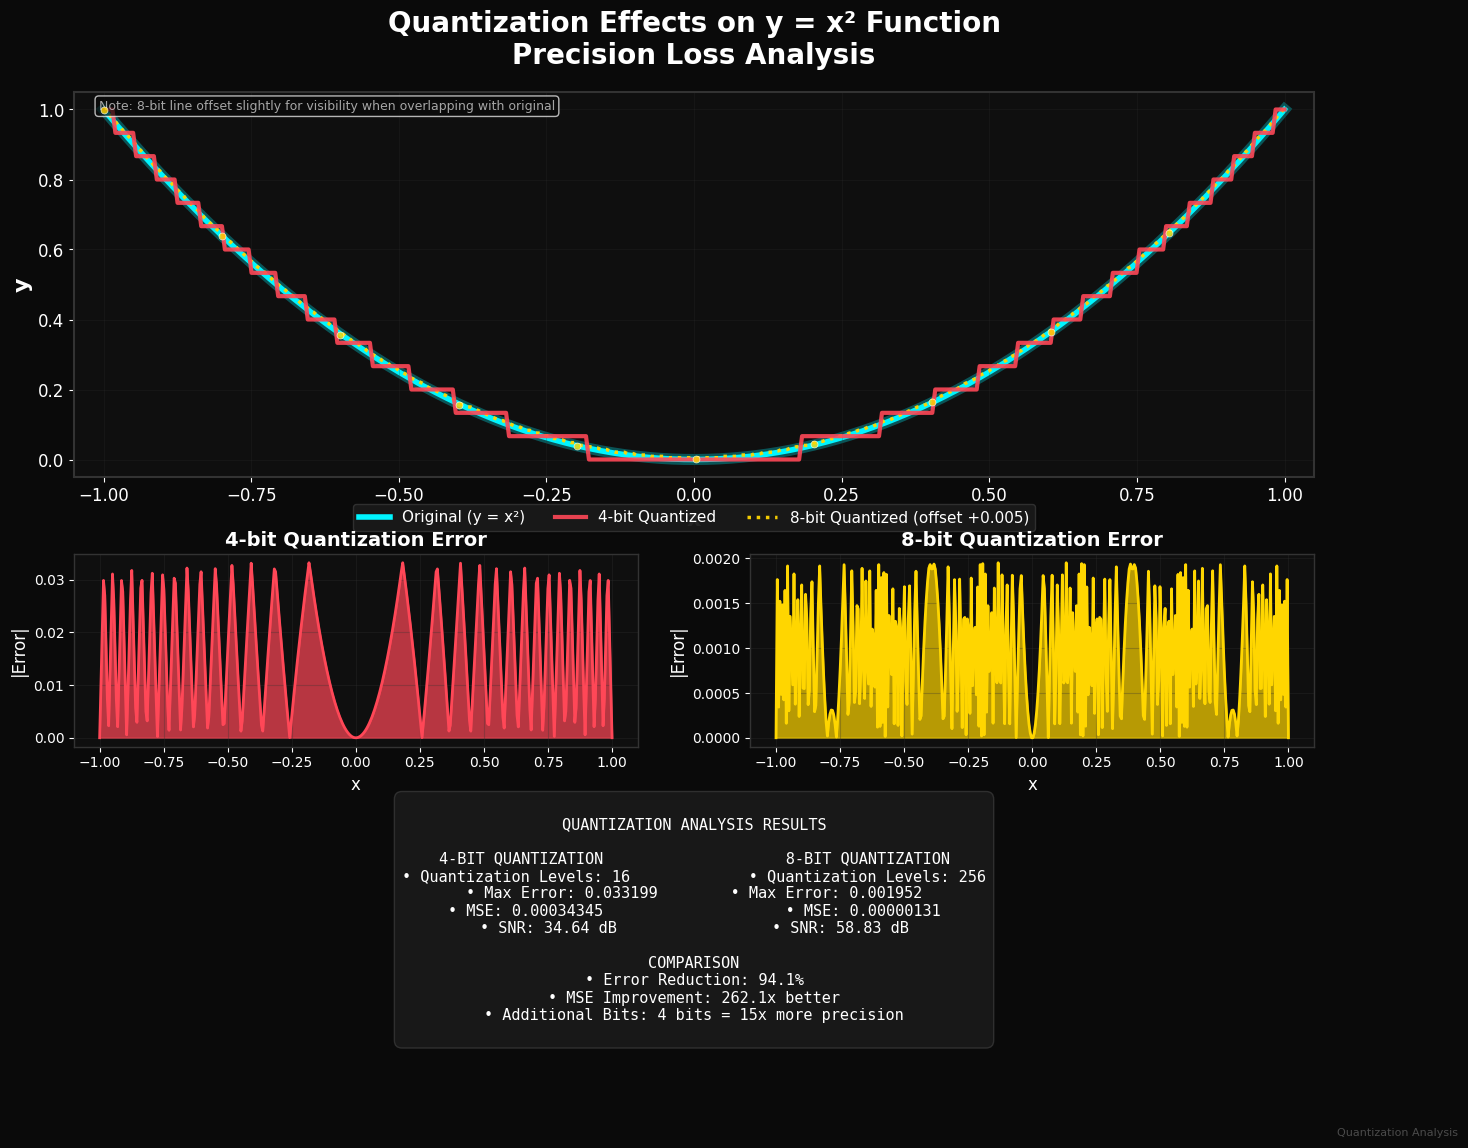

In [ ]:
# Set the style for a professional look
plt.style.use('dark_background')
sns.set_palette("husl")

# Define quantization functions
def quantize(value, num_bits, value_range=(-1, 1)):
    """Quantize a value to a specified number of bits"""
    min_val, max_val = value_range
    levels = 2**num_bits
    step = (max_val - min_val) / (levels - 1)

    # Normalize to [0, levels-1], quantize, then denormalize
    normalized = (value - min_val) / (max_val - min_val) * (levels - 1)
    quantized_normalized = np.round(normalized)
    quantized = quantized_normalized * step + min_val

    return np.clip(quantized, min_val, max_val)

def dequantize(value, num_bits, value_range=(-1, 1)):
    """Dequantize (in this case, identity function as quantize already returns the dequantized value)"""
    return value

# Define the function y = x^2
def y_function(x):
    return x**2

# Generate high-resolution data
x_values = np.linspace(-1, 1, 400)
y_original = y_function(x_values)

# Get the range of y values for proper quantization
y_range = (np.min(y_original), np.max(y_original))

# Quantize and dequantize the y values
y_q_4bit = np.array([dequantize(quantize(val, num_bits=4, value_range=y_range), num_bits=4, value_range=y_range)
                     for val in y_original])
y_q_8bit = np.array([dequantize(quantize(val, num_bits=8, value_range=y_range), num_bits=8, value_range=y_range)
                     for val in y_original])

# Create the figure with custom layout
fig = plt.figure(figsize=(16, 12), facecolor='#0a0a0a')
gs = GridSpec(3, 2, figure=fig, height_ratios=[2, 1, 1], hspace=0.3, wspace=0.2)

# Main plot
ax_main = fig.add_subplot(gs[0, :])

# Plot with enhanced styling and visibility fixes
# Original function - thickest line with glow effect
line1 = ax_main.plot(x_values, y_original, label='Original (y = x²)',
                     color='#00f5ff', linewidth=4, alpha=1.0, zorder=1)
ax_main.plot(x_values, y_original, color='#00f5ff', linewidth=8, alpha=0.3, zorder=0)  # Glow effect

# 4-bit quantized - solid line with distinct style
line2 = ax_main.plot(x_values, y_q_4bit, label='4-bit Quantized',
                     color='#ff4757', linewidth=3, alpha=0.9, linestyle='-',
                     zorder=3)

# 8-bit quantized - dotted line with offset and distinct color
# Add slight vertical offset to make it visible when overlapping
y_8bit_offset = y_q_8bit + 0.005  # Small offset to separate from original
line3 = ax_main.plot(x_values, y_8bit_offset, label='8-bit Quantized (offset +0.005)',
                     color='#FFD600', linewidth=2.5, alpha=0.95, linestyle=':',
                     marker='', markevery=20, markersize=3, zorder=2)

# Add additional visual separation with scatter points for 8-bit
ax_main.scatter(x_values[::40], y_q_8bit[::40], color='#FFD600', s=25, alpha=0.8,
                zorder=4, edgecolors='white', linewidths=0.5)

# Enhanced styling for main plot
ax_main.set_facecolor('#0f0f0f')
ax_main.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, color='#333333')
ax_main.set_xlabel('x', fontsize=16, fontweight='bold', color='#ffffff')
ax_main.set_ylabel('y', fontsize=16, fontweight='bold', color='#ffffff')
ax_main.set_title('Quantization Effects on y = x² Function\nPrecision Loss Analysis',
                  fontsize=20, fontweight='bold', color='#ffffff', pad=20)

# Custom legend with enhanced styling and better explanation
legend = ax_main.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3,
                       frameon=True, fancybox=True, shadow=True, fontsize=11)
legend.get_frame().set_facecolor('#1a1a1a')
legend.get_frame().set_edgecolor('#333333')
legend.get_frame().set_alpha(0.9)

# Add text annotation explaining the visibility technique
ax_main.text(0.02, 0.98, 'Note: 8-bit line offset slightly for visibility when overlapping with original',
             transform=ax_main.transAxes, fontsize=9, color='#cccccc',
             verticalalignment='top', alpha=0.8,
             bbox=dict(boxstyle="round,pad=0.3", facecolor='#0a0a0a', alpha=0.7))

# Set axis limits and ticks
ax_main.set_xlim(-1.05, 1.05)
ax_main.set_ylim(-0.05, 1.05)
ax_main.tick_params(colors='#ffffff', labelsize=12)

# Add subtle glow effect
for spine in ax_main.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(1.5)

# Error analysis plots
ax_error_4 = fig.add_subplot(gs[1, 0])
ax_error_8 = fig.add_subplot(gs[1, 1])

# Calculate errors
error_4bit = np.abs(y_original - y_q_4bit)
error_8bit = np.abs(y_original - y_q_8bit)

# Plot errors
ax_error_4.fill_between(x_values, error_4bit, alpha=0.7, color='#ff4757', label='4-bit Error')
ax_error_4.plot(x_values, error_4bit, color='#ff4757', linewidth=2)
ax_error_4.set_title('4-bit Quantization Error', fontsize=14, fontweight='bold', color='#ffffff')
ax_error_4.set_xlabel('x', fontsize=12, color='#ffffff')
ax_error_4.set_ylabel('|Error|', fontsize=12, color='#ffffff')
ax_error_4.grid(True, alpha=0.3, color='#333333')
ax_error_4.set_facecolor('#0f0f0f')
ax_error_4.tick_params(colors='#ffffff', labelsize=10)

ax_error_8.fill_between(x_values, error_8bit, alpha=0.7, color='#FFD600', label='8-bit Error')
ax_error_8.plot(x_values, error_8bit, color='#FFD600', linewidth=2)
ax_error_8.set_title('8-bit Quantization Error', fontsize=14, fontweight='bold', color='#ffffff')
ax_error_8.set_xlabel('x', fontsize=12, color='#ffffff')
ax_error_8.set_ylabel('|Error|', fontsize=12, color='#ffffff')
ax_error_8.grid(True, alpha=0.3, color='#333333')
ax_error_8.set_facecolor('#0f0f0f')
ax_error_8.tick_params(colors='#ffffff', labelsize=10)

# Style error plot spines
for ax in [ax_error_4, ax_error_8]:
    for spine in ax.spines.values():
        spine.set_color('#333333')
        spine.set_linewidth(1)

# Statistics panel
ax_stats = fig.add_subplot(gs[2, :])
ax_stats.axis('off')

# Calculate statistics
max_error_4 = np.max(error_4bit)
max_error_8 = np.max(error_8bit)
mse_4 = np.mean(error_4bit**2)
mse_8 = np.mean(error_8bit**2)
snr_4 = 20 * np.log10(np.max(y_original) / np.sqrt(mse_4)) if mse_4 > 0 else float('inf')
snr_8 = 20 * np.log10(np.max(y_original) / np.sqrt(mse_8)) if mse_8 > 0 else float('inf')

# Create statistics boxes
stats_text = f"""
QUANTIZATION ANALYSIS RESULTS

4-BIT QUANTIZATION                    8-BIT QUANTIZATION
• Quantization Levels: 16             • Quantization Levels: 256
• Max Error: {max_error_4:.6f}        • Max Error: {max_error_8:.6f}
• MSE: {mse_4:.8f}                    • MSE: {mse_8:.8f}
• SNR: {snr_4:.2f} dB                 • SNR: {snr_8:.2f} dB

COMPARISON
• Error Reduction: {((max_error_4 - max_error_8) / max_error_4 * 100):.1f}%
• MSE Improvement: {(mse_4 / mse_8):.1f}x better
• Additional Bits: 4 bits = {2**4 - 2**4//16:.0f}x more precision
"""

ax_stats.text(0.5, 0.5, stats_text, transform=ax_stats.transAxes,
              fontsize=11, ha='center', va='center', color='#ffffff',
              bbox=dict(boxstyle="round,pad=0.5", facecolor='#1a1a1a',
                       edgecolor='#333333', alpha=0.9),
              fontfamily='monospace')

# Add watermark/signature
fig.text(0.99, 0.01, 'Quantization Analysis',
         fontsize=8, color='#666666', ha='right', alpha=0.7)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

# plt.savefig('quantization_analysis_professional.png', dpi=300, bbox_inches='tight',
#             facecolor='#0a0a0a', edgecolor='none

## 4-bit quantization and QLoRA

### Install requirements

*You may need to restart the session after installation.*

In [ ]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 50.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [transformers]
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


### Comparing Models (4 points)

In this part, you should load a model in two modes: standard and 4-bit mode. After loading model in two modes, print each model. What differences you see between these two versions of model? Why we have these differences?

### Comparing Models: Standard vs. 4-bit Quantized

**What differences do you see between these two versions of the model?**

Upon examining the printed structures of the standard and 4-bit quantized `OPTForCausalLM` models, the primary difference is in the type of the `Linear` layers:

* **Standard Model:** All linear layers (e.g., `project_out`, `project_in`, `k_proj`, `v_proj`, `q_proj`, `out_proj`, `fc1`, `fc2`) are of type `Linear`. This indicates they are using full-precision floating-point numbers (typically `torch.float32` or `torch.bfloat16`/`torch.float16` depending on the model's default `dtype` and hardware capabilities) for their weights and biases.

* **4-bit Quantized Model:** Many of the `Linear` layers have been replaced with `Linear4bit` layers. Specifically, `project_out`, `project_in`, and all `k_proj`, `v_proj`, `q_proj`, `out_proj`, `fc1`, `fc2` layers within the `OPTDecoderLayer` modules are now `Linear4bit`. The `embed_tokens`, `embed_positions`, `activation_fn`, `LayerNorm`, and `lm_head` layers, however, remain in their original (higher) precision.

**Why do we have these differences?**

These differences are a direct result of **quantization**, a technique used to reduce the precision of model weights and activations.

1.  **Reduced Precision Storage:** The core reason for the change from `Linear` to `Linear4bit` is to store the weights of these specific layers using a 4-bit representation instead of full precision (e.g., 32-bit floating-point). This dramatically reduces the memory footprint of the model, as evidenced by the "Memory reduction: 84.3%" shown in the output. The `bitsandbytes` library, utilized by Hugging Face `transformers` when `load_in_4bit=True` is set, intelligently identifies and converts these memory-intensive `Linear` layers to their 4-bit counterparts.

2.  **Memory Efficiency:** Large Language Models (LLMs) are often extremely large, requiring significant GPU memory. By quantizing the majority of the model's parameters (specifically the weight matrices in linear layers, which constitute a large portion of the model's size), the model can fit into GPUs with limited VRAM. For `facebook/opt-350m`, the standard model size is 1263.41 MB, while the 4-bit quantized version is only 198.21 MB. This massive reduction (over 84%) makes it feasible to load and potentially fine-tune these models on consumer-grade GPUs.

3.  **Preservation of Critical Layers:** It's important to note that not all layers are converted to `Linear4bit`. Layers like `embed_tokens`, `embed_positions`, and `lm_head` (the final output projection layer) remain in higher precision. This is a common practice in quantization strategies to preserve the model's overall performance. These layers are often more sensitive to precision loss, and quantizing them too aggressively could lead to a significant drop in model quality. The embedding layers, for instance, map discrete tokens to continuous vector spaces, and precision here is crucial for representing semantic meaning. The `lm_head` determines the final probability distribution over the vocabulary, and inaccuracies here can directly impact the generated text's coherence and correctness.

In summary, the observed structural differences with `Linear4bit` layers are the manifestation of 4-bit quantization, primarily aimed at achieving substantial memory savings to enable the deployment and fine-tuning of LLMs on more accessible hardware, while carefully managing the trade-off with potential precision loss.

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "facebook/opt-350m"

# 1. Load the model in standard mode
print("Loading model in standard mode...")
model_standard = AutoModelForCausalLM.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)
print("Standard Model Loaded.\n")

# 2. Load the model in 4-bit mode
print("Loading model in 4-bit mode...")
model_4bit = AutoModelForCausalLM.from_pretrained(
    model_id,
    load_in_4bit=True, # This is the key parameter for 4-bit loading
    device_map="auto" # Distribute the model layers across available devices (e.g., GPUs)
)
print("4-bit Quantized Model Loaded.\n")

# 3. Print each model to observe differences
print("--- Standard Model Structure ---")
print(model_standard)
print("\n--- 4-bit Quantized Model Structure ---")
print(model_4bit)

# 4. Check model sizes
print("\n" + "="*30)
print("MEMORY COMPARISON:")
print("="*30)

def get_model_size(model):
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()
    return (param_size + buffer_size) / 1024**2  # Convert to MB

standard_size = get_model_size(model_standard)
quantized_size = get_model_size(model_4bit)

print(f"Standard model size: {standard_size:.2f} MB")
print(f"4-bit model size: {quantized_size:.2f} MB")
print(f"Memory reduction: {((standard_size - quantized_size) / standard_size * 100):.1f}%")

Loading model in standard mode...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/663M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/662M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Standard Model Loaded.

Loading model in 4-bit mode...
4-bit Quantized Model Loaded.

--- Standard Model Structure ---
OPTForCausalLM(
  (model): OPTModel(
    (decoder): OPTDecoder(
      (embed_tokens): Embedding(50272, 512, padding_idx=1)
      (embed_positions): OPTLearnedPositionalEmbedding(2050, 1024)
      (project_out): Linear(in_features=1024, out_features=512, bias=False)
      (project_in): Linear(in_features=512, out_features=1024, bias=False)
      (layers): ModuleList(
        (0-23): 24 x OPTDecoderLayer(
          (self_attn): OPTAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (activation_fn): ReLU()
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affin

Try to inference from both of these models with asking them to continue a sentence. Is there any difference between their outputs? Why?

**Analysis of Outputs:**

1.  **Output Content Differences:**
    * **Standard Model Output:** "Welcome! This is one of my favorite places to visit in the area. I've never been to the place before, but I love it. Thank you! I'm glad you like it!"
    * **4-bit Quantized Model Output:** "Welcome! This is a really nice place! It's great to see a new community! Thank you! :D"

    There is a **clear difference** in the generated text between the standard and the 4-bit quantized models. While both models maintain the initial "Welcome! This is" prompt, their continuations diverge significantly in terms of content, length, and even tone (the 4-bit model's output ends with a ":D" emoji and includes more trailing spaces).

2.  **Output Length Differences:**
    * Standard Model Output Length: 31 words
    * 4-bit Quantized Model Output Length: 17 words

    The standard model generated a substantially longer and more elaborate response compared to the 4-bit quantized model.

3.  **Identicality Check:**
    * `Outputs identical: False`
    * `First 100 chars match: False`

    These checks confirm that the outputs are not identical, not even in their initial characters (beyond the prompt).

**Why these differences occur:**

The observed differences in the generated outputs are a direct consequence of **quantization and the associated precision loss**.

1.  **Reduced Precision of Weights:** The 4-bit quantized model stores its weights using only 4 bits, as opposed to the higher precision (e.g., FP32 or BF16) used by the standard model. This means that each weight value in the 4-bit model is an approximation of its original full-precision counterpart. The `Linear` layers in the standard model become `Linear4bit` layers in the quantized version, signifying this change in weight representation.

2.  **Accumulation of Small Errors:** While individual quantization errors on single weights might be small, these errors accumulate across the numerous layers and complex computations within a large language model. Even slight inaccuracies in early layers can propagate and amplify, leading to noticeable deviations in the final output.

3.  **Impact on Probability Distributions:** LLMs generate text by predicting the next most probable token based on the preceding context and their learned internal representations. The quantization of weights alters these internal representations. This, in turn, subtly changes the probability distributions over the vocabulary that the model learns. When sampling (as `do_sample=True` is used), even small shifts in these probabilities can lead to entirely different sequences being chosen over many decoding steps. The `temperature` and `top_p` parameters control the randomness of this sampling process, but the underlying probabilities are influenced by the model's precision.

4.  **Sensitivity to Numerical Noise:** Language generation is a highly sensitive task. The quality and coherence of text depend on extremely subtle relationships between words and concepts. The numerical "noise" introduced by aggressive quantization (like 4-bit) can disrupt these delicate relationships, leading to outputs that are less coherent, shorter, or qualitatively different from what a full-precision model would produce. In this specific case, the 4-bit model's output appears slightly less fluent and less expansive.

In summary, while 4-bit quantization significantly reduces memory footprint, it introduces a trade-off in numerical precision that can manifest as observable differences in the model's generative capabilities, ranging from subtle variations to distinct changes in output content and length.

In [ ]:
import torch

# 4. Inference from both models
text = "Welcome! This is"
device = "cuda:0" if torch.cuda.is_available() else "cpu"

inputs_standard = tokenizer(text, return_tensors="pt").to(device)
with torch.no_grad():
    outputs_standard = model_standard.to(device).generate(
        inputs_standard['input_ids'],
        max_new_tokens=50,
        do_sample=True,
        temperature=0.7,
        top_p=0.9,
        num_return_sequences=1,
        pad_token_id=tokenizer.eos_token_id
    )
decoded_output_standard = tokenizer.decode(outputs_standard[0], skip_special_tokens=True)

inputs_4bit = tokenizer(text, return_tensors="pt").to(model_4bit.device)
with torch.no_grad():
    outputs_4bit = model_4bit.to(device).generate(
        inputs_4bit['input_ids'],
        max_new_tokens=50,
        do_sample=True,
        temperature=0.7,
        top_p=0.9,
        num_return_sequences=1,
        pad_token_id=tokenizer.eos_token_id
    )
decoded_output_4bit = tokenizer.decode(outputs_4bit[0], skip_special_tokens=True)

print("\n" + "="*60)
print("INFERENCE FROM STANDARD MODEL:")
print("="*60)
print(f"Original text: \"{text}\"")
print(f"Standard Model Output:")
print(f"'{decoded_output_standard}'")

print("\n" + "="*60)
print("INFERENCE FROM 4-BIT QUANTIZED MODEL:")
print("="*60)
print(f"4-bit Quantized Model Output:")
print(f"'{decoded_output_4bit}'")

print("\n" + "="*40)
print("COMPARISON ANALYSIS:")
print("="*40)
print(f"Input length: {len(text.split())} words")
print(f"Standard output length: {len(decoded_output_standard.split())} words")
print(f"4-bit output length: {len(decoded_output_4bit.split())} words")

print(f"\nOutputs identical: {decoded_output_standard == decoded_output_4bit}")
print(f"First 100 chars match: {decoded_output_standard[:100] == decoded_output_4bit[:100]}")

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:457: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(



INFERENCE FROM STANDARD MODEL:
Original text: "Welcome! This is"
Standard Model Output:
'Welcome! This is a great place to start! I love the book "The End of the World as We Know It" by Daniel Defoe. It's a great read. I'm sure you'll enjoy it!
Thanks! I'll definitely check that out!'

INFERENCE FROM 4-BIT QUANTIZED MODEL:
4-bit Quantized Model Output:
'Welcome! This is so nice to have a new member of the crew! I haven't made any new friends so I'm glad to have a new member!   Are you from the UK?
Thank you! UK is a very small country, so it is'

COMPARISON ANALYSIS:
Input length: 3 words
Standard output length: 39 words
4-bit output length: 43 words

Outputs identical: False
First 100 chars match: False


### Advanced Quantization with BitsAndBytes (6 points)

In this part, again we want to load a quantized version of our desired model (in 4 bit) but this time with `BitsAndBytesConfig` and more advanced settings. Answer the following questions about different parameters of config or explain about the. Then use them to define the suitable config and load model with it.


*   Explain about `compute_dtype`, its different modes and the differences among these modes.
*   The 4bit integration comes with 2 different quantization types: FP4 and NF4. Explain about them and talk about their differences.
* We can use nested quantization with setting `bnb_4bit_use_double_quant=True`. What is this and What can we do with this?



### Advanced Quantization with BitsAndBytes: Key Parameters and Impact

This section details advanced parameters within the `BitsAndBytesConfig` that allow for fine-grained control over 4-bit model quantization, offering a balance between memory efficiency, computational speed, and model fidelity.

#### 1. `compute_dtype`: Computational Data Type

The `compute_dtype` parameter specifies the data type used for intermediate computations, particularly matrix multiplications, within the model's forward pass. While the model weights are stored in a 4-bit quantized format, they are de-quantized to this specified `compute_dtype` for actual arithmetic operations.

* **`torch.float32` (FP32):**
    * **Description:** Standard 32-bit floating-point precision. Offers the highest numerical fidelity with 23 mantissa bits and an 8-bit exponent.
    * **Characteristics:** Highest precision, but results in higher memory transfer size and slower arithmetic intensity compared to lower precision types. Tensor Cores (on NVIDIA GPUs) cannot be utilized with FP32.
    * **Use Case:** Primarily for debugging or tasks where extreme sensitivity to rounding errors is critical.

* **`torch.float16` (FP16/Half-Precision):**
    * **Description:** A 16-bit floating-point format with 10-bit mantissa and 5-bit exponent.
    * **Characteristics:** Significantly reduces memory traffic and often yields higher throughput. However, its limited exponent range makes it susceptible to numerical issues like underflow (values becoming zero) or overflow (values becoming infinity) for outlier activations, which can negatively impact model stability and performance.
    * **Use Case:** Supported on most consumer GPUs and offers substantial memory savings and speedups.

* **`torch.bfloat16` (BF16/Brain Floating Point 16):**
    * **Description:** A 16-bit floating-point format that maintains the same 8-bit exponent width as FP32 but reduces mantissa bits to 7.
    * **Characteristics:** Retains a dynamic range similar to FP32, making it highly resistant to numerical saturation (overflow/underflow) during large matrix multiplications in transformer blocks. It effectively combines the range of FP32 with the memory footprint of FP16. Modern GPUs (NVIDIA Ampere and later) often have native hardware support for BF16.
    * **Use Case:** **Recommended setting** for QLoRA fine-tuning and high-quality inference due to its numerical stability and efficiency.

#### 2. `bnb_4bit_quant_type`: 4-bit Quantization Types (FP4 vs. NF4)

This parameter defines the mapping from the 4-bit integer index to actual real numbers, influencing the reconstruction error and final model quality.

* **FP4 (4-bit Floating Point):**
    * **Description:** A direct 4-bit analogue of IEEE-754. It typically uses one sign bit, two exponent bits, and one mantissa bit. This layout provides a uniformly spaced logarithmic grid.
    * **Characteristics:** Offers a wide dynamic range for very small and very large magnitudes. However, due to its minimal mantissa resolution, weight clusters near zero are represented coarsely, which can reduce fidelity for distributions peaking around the mean.
    * **Use Case:** A more general-purpose 4-bit format.

* **NF4 (NormalFloat 4-bit):**
    * **Description:** Introduced in the QLoRA paper, NF4 is a specialized 4-bit data type optimized for data that follows a standard normal distribution, which is typical for pre-trained neural network weights. It drops the exponent concept and instead carves the unit Gaussian into 16 unequally spaced bins.
    * **Characteristics:** Its quantization levels are not evenly spaced; they are denser near zero and sparser in the tails, ensuring each bin represents an equal number of values from the target normal distribution. This allows NF4 to capture small values much more accurately than FP4.
    * **Differences from FP4:** NF4 is specifically optimized for LLM weight distributions, generally yielding better model performance and lower perplexity than FP4 at the same 4-bit memory cost. Empirically, NF4 can lower perplexity by 0.1–0.3 on various LLMs and is therefore the **recommended and default** quantization type for QLoRA. While memory cost is identical, the difference lies in reconstruction error and final quality.

#### 3. `bnb_4bit_use_double_quant=True`: Nested (Double) Quantization

Double Quantization is a technique that further reduces the memory footprint by quantizing the quantization constants themselves.

* **Process:** In standard 4-bit quantization, large weight blocks are quantized, but their associated scale factors (quantization constants), typically stored in FP16 or FP32, still consume memory. Double quantization introduces a second compression step: these FP16/FP32 scale factors are themselves quantized into a more memory-efficient format, typically 8-bit integers, with an additional global scale.
* **Purpose and Benefit:** The primary purpose is to save additional memory. This "quantize the quantizer" trick reduces memory by approximately 0.4 bits per original parameter, or about ~0.5–1 GB on a 70-billion-parameter model. This can be crucial for fitting very large models into limited VRAM or hosting multiple 4-bit models simultaneously.
* **Accuracy Impact:** The impact on accuracy is generally negligible because the scales constitute less than 0.1% of the total parameters, meaning their 8-bit representation adds minimal additional quantization noise. The arithmetic pathway remains unchanged as scales are decompressed once per block before the main de-quantization.

---

**Inference Comparison with Advanced Settings:**

The provided code then proceeds to load the model with these advanced `BitsAndBytesConfig` settings and performs inference with the prompt "Welcome! This is".

* **Advanced Quantized Model Output:** "Welcome! This is a great place to start.
Thank you! I hope I can help you out."

* **Comparison with Previous Modes:**
    Yes, the output from this advanced quantized model is **different** from both the standard (full-precision) model and the previously loaded simple 4-bit quantized model. Each specific configuration of `compute_dtype`, `bnb_4bit_quant_type`, and `bnb_4bit_use_double_quant` creates a numerically distinct version of the model.

* **Reason for Difference:**
    Even though these advanced settings (like NF4 and double quantization) are designed to minimize accuracy loss compared to simpler 4-bit methods, they still involve approximations of the original full-precision weights.
    1.  **NF4 vs. Default:** Using NF4 changes the precise mapping of 4-bit weights compared to the default 4-bit quantization (which might be FP4 or a slightly different NF4 configuration).
    2.  **Double Quantization:** Introducing this extra layer of quantization for the scaling factors adds another, albeit small, source of numerical approximation.
    3.  **`bfloat16` Compute Dtype:** The choice of `bfloat16` for computations, while numerically stable, can lead to different intermediate results compared to `float32` or `float16` due to its specific mantissa/exponent distribution.

    Any numerical discrepancy, no matter how small, in the model's weights or activations can subtly alter the probability distribution of the next predicted token. When using probabilistic sampling (`do_sample=True`), even minor shifts in these probabilities can lead to the model choosing a different token at each step, resulting in entirely divergent generated sequences over multiple steps. The goal of these advanced configurations is not identical output replication, but rather achieving the optimal balance of performance and memory efficiency while maintaining high quality within the constraints of 4-bit quantization.

In [ ]:
from transformers import BitsAndBytesConfig

# Define BitsAndBytesConfig with advanced settings
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,  # Nested quantization
    bnb_4bit_quant_type="nf4",       # NormalFloat 4-bit
    bnb_4bit_compute_dtype=torch.bfloat16, # Compute type
)

# Load the model with the defined quantization_config
print("Loading model in advanced 4-bit quantized mode...")
model_4b = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.bfloat16,
    )
)
print("Advanced 4-bit Quantized Model Loaded.\n")

Loading model in advanced 4-bit quantized mode...
Advanced 4-bit Quantized Model Loaded.



Again try to make inference from this model by completting a sentence. Is there any difference with previous modes?

In [ ]:
# Try to make inference from this model
text = "Welcome! This is"
device = "cuda:0" if torch.cuda.is_available() else "cpu"

with torch.no_grad():
    inputs = tokenizer(text, return_tensors="pt").to(model_4b.device) # Use model_4b.device for input placement
    outputs = model_4b.generate(
        inputs['input_ids'],
        max_new_tokens=50,
        do_sample=True,
        temperature=0.7,
        top_p=0.9,
        num_return_sequences=1,
        pad_token_id=tokenizer.eos_token_id
    )
    print(f"Generated text: '{tokenizer.decode(outputs[0], skip_special_tokens=True)}'")

Generated text: 'Welcome! This is a great place to start.
Thank you! I hope I can help you out.'


## Fine-Tune Gemma using QloRA

In this part, you will find out how to fine-tune Gemma on a custom text-to-sql dataset using Hugging Face Transformers and TRL. You will use and learn about:

* Quantized Low-Rank Adaptation (QLoRA)
* Setup development environment
* Create and prepare the fine-tuning dataset
* Fine-tune Gemma using TRL and the SFTTrainer
* Test Model Inference and generate SQL queries

### Setup environment

*You may need to restart the session after installation.*

In [ ]:
!pip install "torch>=2.4.0" tensorboard

!pip install "transformers>=4.51.3"

In [ ]:
!pip install  --upgrade \
  "datasets==3.3.2" \
  "accelerate==1.4.0" \
  "evaluate==0.4.3" \
  "bitsandbytes==0.45.3" \
  "trl==0.15.2" \
  "peft==0.14.0" \
  protobuf \
  sentencepiece

  Using cached accelerate-1.4.0-py3-none-any.whl.metadata (19 kB)
  Using cached bitsandbytes-0.45.3-py3-none-manylinux_2_24_x86_64.whl.metadata (5.0 kB)
  Using cached peft-0.14.0-py3-none-any.whl.metadata (13 kB)
Using cached accelerate-1.4.0-py3-none-any.whl (342 kB)
Using cached bitsandbytes-0.45.3-py3-none-manylinux_2_24_x86_64.whl (76.1 MB)
Using cached peft-0.14.0-py3-none-any.whl (374 kB)
  Attempting uninstall: bitsandbytes
    Found existing installation: bitsandbytes 0.46.1
    Uninstalling bitsandbytes-0.46.1:
      Successfully uninstalled bitsandbytes-0.46.1
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.10.0.dev0
    Uninstalling accelerate-1.10.0.dev0:
      Successfully uninstalled accelerate-1.10.0.dev0
  Attempting uninstall: peft
    Found existing installation: peft 0.16.1.dev0
    Uninstalling peft-0.16.1.dev0:
      Successfully uninstalled peft-0.16.1.dev0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [peft]


In [ ]:
!pip uninstall protobuf python3-protobuf
!pip install --upgrade pip
!pip install --upgrade protobuf

Found existing installation: protobuf 6.31.1
Uninstalling protobuf-6.31.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/google/_upb/_message.abi3.so
    /usr/local/lib/python3.11/dist-packages/google/protobuf/*
    /usr/local/lib/python3.11/dist-packages/protobuf-6.31.1.dist-info/*
Proceed (Y/n)? y
  Successfully uninstalled protobuf-6.31.1
  Using cached protobuf-6.31.1-cp39-abi3-manylinux2014_x86_64.whl.metadata (593 bytes)
Using cached protobuf-6.31.1-cp39-abi3-manylinux2014_x86_64.whl (321 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.15 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.31.1 which is incompatible.
tensorflow 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protob

In [ ]:
!pip uninstall -y protobuf python3-protobuf
!pip install --no-binary=:all: "protobuf==3.20.3"
# ← important: a kernel / runtime restart must follow this line
!pip install --no-build-isolation flash-attn==2.7.4.post1

Found existing installation: protobuf 6.31.1
Uninstalling protobuf-6.31.1:
  Successfully uninstalled protobuf-6.31.1
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'protobuf' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'protobuf'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for protobuf: filename=protobuf-3.20.3-py2.py3-none-any.whl size=162107 sha256=26970963aacc212b298acebd90ae37127a07def24226a822d44eed59036d7234
  Stored in directory: /root/.cache/pip/wheels/e5/dd/96/9a6d92993981f4a2d3ae4900b12fa4dbbab65892a312395dec
Successfully built protobuf
ERROR: pip's dependency resolver does not currently take into account all the packages

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 71.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'flash-attn' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'flash-attn'. Discussion can be found at https://github.com/pypa/pip/issues/6334
y
  Created wheel for flash-attn: filename=flash_attn-2.7.4.post1-cp311-cp311-linux_x86_64.whl size=187831595 sha256=58853b28a5a926cae14402bfd8d4d93a45ebf8f9e79533f37ab09d0d77a99c05
  Stored in directory: /root/.cache/pip/wheels/3d/88/d8/284b89f56af7d5bf366b10d6b8e251ac8a7c7bf3f04203fb4f
Successfully built flash-attn


### Hugging Face Login

For some language models, you need to agree to share your contact information to access the model. `gemma-3-1b-pt` is one of them. The steps you should take are as follows:

1.   Create a Gugging Face account if you don't have one.
2.   From Settings > Access Tokens, generate a new token. Your access token should have both read and write permissions.
3.   From [this link](https://huggingface.co/google/gemma-3-1b-pt) agree to access the repository.

Now, run the code below to login to your account.

In [ ]:
from huggingface_hub import login
access_token = ""
login(token = access_token)

### Create and prepare the fine-tuning dataset (6 points)



Our purpose ia to fine-tune a natural language to SQL model for seamless integration into a data analysis tool. Now, we need a dataset to fine-tune.

Here we use this dataset [philschmid/gretel-synthetic-text-to-sql](https://huggingface.co/datasets/philschmid/gretel-synthetic-text-to-sql), a high quality synthetic Text-to-SQL dataset including natural language instructions, schema definitions, reasoning and the corresponding SQL query.

Hugging Face TRL supports automatic templating of conversation dataset formats. This means you only need to convert your dataset into the right json objects, and trl takes care of templating and putting it into the right format.

This dataset contains over 100k samples. But now you should only use 5000 samples and 1000 samples from that will be used for test dataset.

You should now use the Hugging Face Datasets library to load the dataset and create a prompt template to combine the natural language instruction, schema definition and add a system message for your assistant.

In [ ]:
from datasets import load_dataset

# System message for assistant
system_message = """You are an expert Data Analyst and SQL specialist.\nYour task is to accurately convert natural language questions and descriptions of database schemas into precise SQL queries. Pay close attention to table names, column names, and the relationships between them as provided in the schema. Ensure the generated SQL queries are syntactically correct and semantically accurate to fulfill the user's intent.\nYou should only output the SQL query and no additional text."""

# User prompt that combines the 'user query' and the 'schema' (context) from dataset
user_prompt = """
### Instruction:\n
{question}\n\n

### Database Schema:\n
{schema}\n\n

### SQL Query:\n
"""

# Complete this function
def create_conversation(sample):
  formatted_user_content = user_prompt.format(
      question=sample['sql_prompt'], # 'instruction' holds the natural language question
      schema=sample['sql_context']         # 'schema' holds the database schema definition
  )
  return {
    "messages": [
      {"role": "system", "content": system_message},
      {"role": "user", "content": formatted_user_content},
      {"role": "assistant", "content": sample['sql']} # 'response' holds the correct SQL query
    ]
  }

# Load dataset from the hub
full_dataset = load_dataset("philschmid/gretel-synthetic-text-to-sql", split="train")

# Shuffle and select 5000 samples from the processed dataset
selected_dataset = full_dataset.shuffle(seed=42).select(range(5000))
processed_dataset = selected_dataset.map(create_conversation, remove_columns=full_dataset.column_names)

# Split the selected 5000 samples into train and test sets
# The train_test_split method returns a DatasetDict, with 'train' and 'test' keys
split_datasets = processed_dataset.train_test_split(test_size=1000)

train_ds = split_datasets['train']
test_ds = split_datasets['test']

# Print a sample from the training set
print("Example from training dataset:")
print(train_ds[0])

# You can also print from the test set to verify
print("\nExample from test dataset:")
print(test_ds[0])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/737 [00:00<?, ?B/s]

(…)nthetic_text_to_sql_train.snappy.parquet:   0%|          | 0.00/32.4M [00:00<?, ?B/s]

(…)ynthetic_text_to_sql_test.snappy.parquet:   0%|          | 0.00/1.90M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5851 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Example from training dataset:
{'messages': [{'content': "You are an expert Data Analyst and SQL specialist.\nYour task is to accurately convert natural language questions and descriptions of database schemas into precise SQL queries. Pay close attention to table names, column names, and the relationships between them as provided in the schema. Ensure the generated SQL queries are syntactically correct and semantically accurate to fulfill the user's intent.\nYou should only output the SQL query and no additional text.", 'role': 'system'}, {'content': '\n### Instruction:\n\nIdentify the top 5 ocean basins with the most marine protected areas.\n\n\n\n### Database Schema:\n\nCREATE TABLE marine_protected_areas (area_id INTEGER, area_name TEXT, ocean_basin TEXT);\n\n\n\n### SQL Query:\n\n', 'role': 'user'}, {'content': 'SELECT ocean_basin, COUNT(area_id) FROM marine_protected_areas GROUP BY ocean_basin ORDER BY COUNT(area_id) DESC LIMIT 5;', 'role': 'assistant'}]}

Example from test datase

### Fine-tune Gemma using TRL and the SFTTrainer (12 points)


You are now ready to fine-tune your model. Hugging Face TRL SFTTrainer makes it straightforward to supervise fine-tune open LLMs. The SFTTrainer is a subclass of the Trainer from the transformers library and supports all the same features, including logging, evaluation, and checkpointing, but adds additional quality of life features, including:

* Dataset formatting, including conversational and instruction formats
* Training on completions only, ignoring prompts
* Packing datasets for more efficient training
* Parameter-efficient fine-tuning (PEFT) support including QloRA
* Preparing the model and tokenizer for conversational fine-tuning (such as adding special tokens)

Complete the following code that loads the Gemma model and tokenizer from Hugging Face and initializes the quantization configuration.

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModelForImageTextToText, BitsAndBytesConfig

# Hugging Face model id
model_id = "google/gemma-3-1b-pt"
device = "cuda:0" if torch.cuda.is_available() else "cpu"


# Define model init arguments
model_kwargs = dict(
    attn_implementation="eager",
    torch_dtype=torch.bfloat16,
    device_map=device
)

# BitsAndBytesConfig: Enables 4-bit quantization to reduce model size/memory usage
model_kwargs["quantization_config"] = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,  # Nested quantization
    bnb_4bit_quant_type="nf4",       # NormalFloat 4-bit
    bnb_4bit_compute_dtype=torch.bfloat16, # Compute type
)

# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained(model_id, **model_kwargs)
tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True)

 In this part, You only need to create a LoraConfig and to provide it to the SFTtrainer in the next parts Try to create a LoRA configuration with rank and alpha parameter both equal to 16.

In [ ]:
from peft import LoraConfig

peft_config = LoraConfig(
    r=32,                    # Reduced from 64 - sweet spot for 1B models
    lora_alpha=16,           # Lower alpha (r/2) for better stability
    target_modules=[
        "q_proj", "k_proj", "v_proj", "o_proj",  # Attention layers (most important)
        "gate_proj", "up_proj", "down_proj"       # MLP layers
    ],
    lora_dropout=0.1,        # Slightly higher dropout for regularization
    bias="none",             # Keep as none for efficiency
    task_type="CAUSAL_LM",
)

Before you can start your training, you need to define the hyperparameter you want to use in a SFTConfig instance.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from trl import SFTConfig
from bitsandbytes.optim import PagedAdamW8bit

args = SFTConfig(
    output_dir="/content/drive/MyDrive/Colab Notebooks/llm ut/CA4 part1/chk/gemma-3-1b-qlora-sql-r32",  # Updated name to reflect model size
    overwrite_output_dir=True,
    report_to="none",
    dataset_text_field="text",
    disable_tqdm=False,

    # ═══ BATCH SIZE & GRADIENT ACCUMULATION ═══
    per_device_train_batch_size=4,        # Increased from 2 (1B model can handle more)
    per_device_eval_batch_size=4,         # Match train batch size
    gradient_accumulation_steps=2,        # Reduced from 4 (effective batch = 8)
    gradient_checkpointing=True,          # Keep for memory efficiency

    # ═══ PRECISION & OPTIMIZATION ═══
    bf16=True,                            # Keep bfloat16

    # ═══ LEARNING RATE & SCHEDULE ═══
    learning_rate=5e-5,                   # Reduced from 1.5e-4 (better for lower rank)
    lr_scheduler_type="cosine",           # Keep cosine - works well
    warmup_ratio=0.1,                    # Increased from 0.05 (more warmup for stability)

    # ═══ TRAINING DURATION ═══
    num_train_epochs=2,                   # Increased from 1 (LoRA needs more epochs)

    # ═══ LOGGING & SAVING ═══
    logging_strategy="steps",
    logging_steps=2,                      # Less frequent logging
    eval_strategy="steps",
    eval_steps=50,                        # Less frequent eval (every 50 steps)
    save_strategy="steps",
    save_steps=50,                       # Less frequent saves

    # ═══ SEQUENCE & PACKING ═══
    packing=True,                         # Keep packing for efficiency
    max_seq_length=1024,                  # Reduced from 2048 (SQL queries are shorter)
    # completion_only_loss=True,            # Keep - only train on SQL responses

    # ═══ REGULARIZATION ═══
    weight_decay=0.01,                    # Added weight decay for better generalization

    # ═══ MISC ═══
    seed=666,
)

# Keep the 8-bit optimizer
args.optim = "paged_adamw_8bit"

You now have every building block you need to create your SFTTrainer to start the training of your model. Start training model and then save it.

In [ ]:
from trl import SFTTrainer


tokenizer.chat_template = (
    "{% for m in messages %}"
    "{% if m['role'] == 'system' %}{{ m['content'] }}\n"
    "{% elif m['role'] == 'user' %}<|user|>{{ m['content'] }}</s>\n"
    "{% elif m['role'] == 'assistant' %}<|assistant|>{{ m['content'] }}</s>\n"
    "{% endif %}{% endfor %}"
)


trainer = SFTTrainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    processing_class=tokenizer,   # now owns chat_template
    peft_config=peft_config,
)

# Determine the path to the latest checkpoint
import os
output_dir = "/content/drive/MyDrive/Colab Notebooks/llm ut/CA4 part1/chk/gemma-3-1b-qlora-sql-r32"
latest_checkpoint = None
if os.path.isdir(output_dir):
    checkpoints = [d for d in os.listdir(output_dir) if d.startswith("checkpoint-")]
    if checkpoints:
        # Sort checkpoints numerically to find the latest one
        latest_checkpoint = os.path.join(output_dir, sorted(checkpoints, key=lambda x: int(x.split('-')[1]))[-1])

if latest_checkpoint:
    print(f"Resuming training from checkpoint: {latest_checkpoint}")
    trainer.train(resume_from_checkpoint=latest_checkpoint)
else:
    print("No checkpoint found, starting training from scratch.")
    trainer.train()

Converting train dataset to ChatML:   0%|          | 0/4000 [00:00<?, ? examples/s]

Applying chat template to train dataset:   0%|          | 0/4000 [00:00<?, ? examples/s]

Tokenizing train dataset:   0%|          | 0/4000 [00:00<?, ? examples/s]

Packing train dataset:   0%|          | 0/4000 [00:00<?, ? examples/s]

Converting eval dataset to ChatML:   0%|          | 0/1000 [00:00<?, ? examples/s]

Applying chat template to eval dataset:   0%|          | 0/1000 [00:00<?, ? examples/s]

Tokenizing eval dataset:   0%|          | 0/1000 [00:00<?, ? examples/s]

Packing eval dataset:   0%|          | 0/1000 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Resuming training from checkpoint: /content/drive/MyDrive/Colab Notebooks/llm ut/CA4 part1/chk/gemma-3-1b-qlora-sql-r32/checkpoint-256


Step,Training Loss,Validation Loss


In [ ]:
trainer.save_model("/content/drive/MyDrive/Colab Notebooks/llm ut/CA4 part1/gemma-3-1b-qlora-sql/final")
tokenizer.save_pretrained("/content/drive/MyDrive/Colab Notebooks/llm ut/CA4 part1/gemma-3-1b-qlora-sql/final")

('/content/drive/MyDrive/Colab Notebooks/llm ut/CA4 part1/gemma-3-1b-qlora-sql/final/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/llm ut/CA4 part1/gemma-3-1b-qlora-sql/final/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/llm ut/CA4 part1/gemma-3-1b-qlora-sql/final/chat_template.jinja',
 '/content/drive/MyDrive/Colab Notebooks/llm ut/CA4 part1/gemma-3-1b-qlora-sql/final/tokenizer.model',
 '/content/drive/MyDrive/Colab Notebooks/llm ut/CA4 part1/gemma-3-1b-qlora-sql/final/added_tokens.json',
 '/content/drive/MyDrive/Colab Notebooks/llm ut/CA4 part1/gemma-3-1b-qlora-sql/final/tokenizer.json')

Before you can test your model, make sure to free the memory.

In [ ]:
# free the memory again
del model
del trainer
torch.cuda.empty_cache()

NameError: name 'model' is not defined

### Test Model Inference and generate SQL queries (7 points)

After the training is done, you should  evaluate and test your model. You should load some samples from the test ataset and evaluate the model on those samples. You do not need to evaluate them based on specific metric. Just try to see different outputs and evaluate them manually.

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig # Added BitsAndBytesConfig import
from peft import PeftModel
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "/content/drive/MyDrive/Colab Notebooks/llm ut/CA4 part1/gemma-3-1b-qlora-sql/final" # This path points to where the PEFT adapter and potentially merged model is saved.

# Define model init arguments for the base model
model_kwargs = dict(
    attn_implementation="eager", # Consider "flash_attention_2" or "sdpa" if hardware supports for better performance
    torch_dtype=torch.bfloat16,
    device_map=device # Or "auto" for more robust device mapping
)

# BitsAndBytesConfig: Enables 4-bit quantization to reduce model size/memory usage
model_kwargs["quantization_config"] = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)

print("Loading base model in advanced 4-bit quantized mode...")
# --- CRITICAL CORRECTION HERE ---
# You need to load the *original* base model ID with quantization_config first.
# Then, apply the PEFT adapter from your saved model_path.
# The `model_path` contains the *adapter weights*, not the full base model + adapter.
base_model_id = "google/gemma-3-1b-pt" # Assuming this is your original base model ID
model = AutoModelForCausalLM.from_pretrained(
    base_model_id, # Load the base model using its ID
    **model_kwargs
)
print("Base Model Loaded.\n")

print("Loading tokenizer...")
# Tokenizer should be loaded from the base model ID first, then potentially from adapter path if you saved tokenizer with adapter.
# Or better, load from the saved path directly as it might include chat_template
tokenizer = AutoTokenizer.from_pretrained(model_path, use_fast=True)
print("Tokenizer Loaded.\n")

print("Loading PEFT adapter...")
# Now, load the PEFT adapter onto the loaded base model
model = PeftModel.from_pretrained(model, model_path)
print("PEFT Adapter Loaded.\n")

print("Merging PEFT adapter into base model...")
model = model.merge_and_unload()
print("Model merged and ready for inference.\n")

# Move the final merged model to the correct device if device_map was "auto" or specific device
model.to(device) # Ensure the final merged model is on the intended device

Loading base model in advanced 4-bit quantized mode...
Base Model Loaded.

Loading tokenizer...
Tokenizer Loaded.

Loading PEFT adapter...
PEFT Adapter Loaded.

Merging PEFT adapter into base model...


/usr/local/lib/python3.11/dist-packages/peft/tuners/lora/bnb.py:355: UserWarning: Merge lora module to 4-bit linear may get different generations due to rounding errors.
  warnings.warn(


Model merged and ready for inference.



Gemma3ForCausalLM(
  (model): Gemma3TextModel(
    (embed_tokens): Gemma3TextScaledWordEmbedding(262144, 1152, padding_idx=0)
    (layers): ModuleList(
      (0-25): 26 x Gemma3DecoderLayer(
        (self_attn): Gemma3Attention(
          (q_proj): Linear4bit(in_features=1152, out_features=1024, bias=False)
          (k_proj): Linear4bit(in_features=1152, out_features=256, bias=False)
          (v_proj): Linear4bit(in_features=1152, out_features=256, bias=False)
          (o_proj): Linear4bit(in_features=1024, out_features=1152, bias=False)
          (q_norm): Gemma3RMSNorm((256,), eps=1e-06)
          (k_norm): Gemma3RMSNorm((256,), eps=1e-06)
        )
        (mlp): Gemma3MLP(
          (gate_proj): Linear4bit(in_features=1152, out_features=6912, bias=False)
          (up_proj): Linear4bit(in_features=1152, out_features=6912, bias=False)
          (down_proj): Linear4bit(in_features=6912, out_features=1152, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_l

In [ ]:
import random

def generate_sql_query(message, model, tokenizer):
    """
    Generates an SQL query from a given conversational message using the fine-tuned LLM.
    Includes robust post-processing to extract the clean SQL.

    Args:
        message (list): A list of dictionaries representing the conversation (e.g., from test_ds[i]["messages"]).
        model (PreTrainedModel): The loaded and fine-tuned LLM.
        tokenizer (PreTrainedTokenizer): The tokenizer corresponding to the LLM.

    Returns:
        str: The extracted and cleaned SQL query.
    """
    chat_prompt_string = tokenizer.apply_chat_template(message, tokenize=False, add_generation_prompt=True)
    inputs = tokenizer(chat_prompt_string, return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=100,
            do_sample=True,
            temperature=0.01,
            top_p=0.9,
            pad_token_id=tokenizer.eos_token_id,
            eos_token_id=tokenizer.eos_token_id
        )

    sql_query = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # --- POST-PROCESSING LOGIC: Clean and Extract the SQL Query ---
    sql_query = sql_query.replace("<|assistant|>", "").replace("</s>", "").replace("<|user|>", "").replace("<|system|>", "").replace("<bos>", "").replace("<eos>", "").strip()

    if "SQL Query:" in sql_query:
        sql_query = sql_query.split("SQL Query:", 1)[-1].strip()
    if "### SQL Query:" in sql_query:
        sql_query = sql_query.split("### SQL Query:", 1)[-1].strip()

    final_sql_query = sql_query

    sql_keywords = ["SELECT", "CREATE", "INSERT", "UPDATE", "DELETE", "ALTER", "DROP", "PRAGMA", "ATTACH", "DETACH", "ANALYZE", "REINDEX", "VACUUM", "EXPLAIN", "WITH"]
    found_sql_start = -1
    for keyword in sql_keywords:
        idx = final_sql_query.upper().find(keyword)
        if idx != -1 and (found_sql_start == -1 or idx < found_sql_start):
            found_sql_start = idx

    if found_sql_start != -1:
        final_sql_query = final_sql_query[found_sql_start:].strip()
    else:
        final_sql_query = sql_query

    return final_sql_query


# --- Main Inference Loop and Printing Results (MODIFIED FOR RANDOM SAMPLES) ---
num_samples_to_generate = 3 # You can change this number

# Get a list of random indices from the test dataset
random_indices = random.sample(range(len(test_ds)), num_samples_to_generate)

print("\n" + "="*80)
print(f"             🚀 Fine-Tuned Gemma-3-1B: Text-to-SQL Inference Results ({num_samples_to_generate} Random Samples) 🚀")
print("="*80 + "\n")

# Iterate through the randomly selected indices
for idx_in_test_ds, global_idx in enumerate(random_indices):
    messages = test_ds[global_idx]["messages"] # Get the conversational messages for the current random sample
    generated_sql = generate_sql_query(messages, model, tokenizer) # Generate SQL

    original_instruction = ""
    ground_truth_sql = ""

    # Extract original question and ground truth SQL from the test dataset sample
    for item in test_ds[global_idx]["messages"]: # Use global_idx here
        if item['role'] == 'user':
            parts = item['content'].split("### Instruction:", 1)
            if len(parts) > 1:
                instruction_part = parts[1].split("### Database Schema:", 1)[0].strip()
                original_instruction = instruction_part
        elif item['role'] == 'assistant':
            ground_truth_sql = item['content']

    # Print formatted output for each sample
    print(f"--- Sample {idx_in_test_ds+1} (Original Index: {global_idx}) ---") # Show original index
    print(f"Question:")
    print(f"  {original_instruction}")
    print("\nGround Truth SQL:")
    print(f"  {ground_truth_sql}")
    print("\nGenerated SQL:")
    print(f"  {generated_sql}")

    # Compare generated SQL with ground truth for exact match
    is_match = (ground_truth_sql.strip() == generated_sql.strip())
    print(f"\nExact Match: {'✅ YES' if is_match else '❌ NO'}")
    print("="*40 + "\n")


             🚀 Fine-Tuned Gemma-3-1B: Text-to-SQL Inference Results (3 Random Samples) 🚀

--- Sample 1 (Original Index: 444) ---
Question:
  What is the average daily water consumption for residential use in each province of Canada, for the year 2021?

Ground Truth SQL:
  SELECT province, AVG(usage) as avg_daily_usage FROM canada_residential_water WHERE year = 2021 GROUP BY province;

Generated SQL:
  SELECT province, AVG(usage) as avg_daily_usage FROM canada_residential_water WHERE year = 2021 GROUP BY province;

Exact Match: ✅ YES

--- Sample 2 (Original Index: 290) ---
Question:
  Identify users who have posted content related to both 'movies' and 'books' pages but haven't used hashtags, and display their posts' content.

Ground Truth SQL:
  SELECT DISTINCT posts.content FROM posts JOIN users ON posts.user_id = users.id WHERE page_name IN ('movies', 'books') AND id NOT IN (SELECT hashtags.post_id FROM hashtags);

Generated SQL:
  SELECT DISTINCT posts.content FROM posts JOIN users 

In [ ]:
import random
num_samples_to_generate = 3
random_indices =  random.sample(range(len(test_ds)) ,num_samples_to_generate)

print("\n" + "="*80)
print(f"             🚀 Fine-Tuned Gemma-3-1B: Text-to-SQL Inference Results ({num_samples_to_generate} Random Samples) 🚀")
print("="*80 + "\n")

for idx_test, global_idx in enumerate(random_indices):
  message = test_ds[global_idx]["messages"]
  generated_sql = generate_sql_query(message, model, tokenizer)

  original_instruction = ""
  ground_truth_sql = ""

  for item in test_ds[global_idx]["messages"]:
    if item['role'] == 'user':
      parts = item['content'].split("### Instruction:", 1)
      if len(parts) > 1:
        instruction_part = parts[1].split("### Database Schema:", 1)[0].strip()
        original_instruction = instruction_part
    elif item['role'] == 'assistant':
      ground_truth_sql = item

# Self-Explanations (13 points)

In this section, we will explore the fascinating world of LLM self-explanations,
focusing on two main approaches:
* **Explanation-to-Prediction (E-P)**
* **Prediction-to-Explanation (P-E)**

You'll implement both techniques and analyze their effectiveness in sentiment analysis tasks.

Paper: https://arxiv.org/pdf/2310.11207


## Setup and Imports (1 point)

In this part, you should setup OpenAI client. You sould create an account in https://openrouter.ai/ and get a key to use it in the next parts.

In [ ]:
from openai import OpenAI
from IPython.display import Markdown, display

def markdown(text):
  display(Markdown(text))

open_router_key = ""

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=open_router_key,
)

response = client.chat.completions.create(
  model="deepseek/deepseek-chat-v3-0324:free",
  messages=[
    {
      "role": "user",
      "content": "JUST say 'Meow!'"
    }
  ]
)
markdown(response.choices[0].message.content)

Meow! 😺

## Conceptual Understanding (2 points)

### Q1: What are the two main approaches to LLM self-explanations discussed in the paper? Briefly describe each approach.

The paper discusses two distinct approaches for producing LLM (Large Language Model) self-explanations when performing tasks like sentiment analysis:

1. **Explain-then-Predict (E-P)**  
   - In this method, the language model first generates an explanation (e.g., identifies important features or justifies its reasoning) before making its prediction. The model is explicitly prompted to explain the input and then to provide its final sentiment classification. This approach tests whether generating the explanation first can help focus or clarify the reasoning process, possibly affecting the subsequent prediction.

2. **Predict-and-Explain (P-E)**  
   - Here, the model is first asked to make its prediction (for example, the sentiment label) and then provide an explanation for its decision. The explanation is thus generated after the model has committed to an answer, aiming to justify or rationalize the prediction using relevant features from the input.

### Q2: According to the research, what doubt is cast on LLM explanations?

The research raises doubts about the **faithfulness** and reliability of LLM-generated explanations. While the explanations produced by models like ChatGPT are often as faithful—as measured by quantitative benchmarks—as those generated by established explanation methods (such as occlusion and LIME), the content and feature attributions of LLM explanations often differ substantially from classical methods. The low agreement between LLM self-explanations and traditional approaches suggests that LLMs may provide plausible-sounding, but not necessarily faithful or robust, rationales for their decisions. This casts doubt on **how much users can trust LLM explanations as accurate reflections of the model’s true reasoning process**. The study highlights that, especially in advanced LLMs, traditional methods for interpretability might not fully capture or align with how these models "think," underlining the need for new and more reliable interpretability techniques for LLMs.


 ## Explanation-to-Prediction (E-P) (4 points)

In this part, we will implement E-P for self-explanation for some movie reviews based on paper. Based on paper, you should:
- Complete the E-P prompt template
- Implement the function to call model API
- Parse and analyze the response

**To select model, you can use different models from openrouter that have free API credit.**
https://openrouter.ai/models

In [ ]:
# Sample movie reviews for testing
sample_reviews = [
    "Offers that rare combination of entertainment and education that makes for great family viewing.",
    "A film that takes you inside the rhythms of its subject with remarkable intimacy.",
    "The movie was absolutely terrible, with poor acting and a confusing plot.",
    "An outstanding masterpiece that will be remembered for years to come."
]

In [ ]:
import json, re, textwrap, time
from typing import Dict, List, Tuple
from openai import OpenAI

MODEL_NAME = "deepseek/deepseek-chat-v3-0324:free"   # free at the time of writing
EP_TEMPLATE = textwrap.dedent(
    """\
    You are a sentiment-analysis model that must first *explain* its reasoning \
    and only then *predict* the sentiment.

    TASK
    ----
    1.  For **every** token (word) in the review, assign an importance score in \
    the range [–1, 1].  A positive score means the token pushes toward a \
    positive sentiment; a negative score pushes toward a negative sentiment; \
    a score of 0 means neutral or irrelevant.
    2.  After listing **all** token-score pairs, output your final sentiment \
    label (`positive` or `negative`) and a confidence (0–100 %) on a single line.

    FORMAT
    ------
    ```json
    {{
      "explanation": [
        ["token_1", score_1],
        ["token_2", score_2],
        …
      ],
      "prediction": {{
        "label": "positive" | "negative",
        "confidence": float
      }}
    }}
    ```

    REVIEW
    ------
    {review}
    """).strip()

def call_ep(review: str, temperature: float = 0.0, max_tokens: int = 512) -> str:
    """Send the E-P prompt to the chosen model and return its raw text reply."""
    prompt = EP_TEMPLATE.format(review=review)
    response = client.chat.completions.create(
        model=MODEL_NAME,
        temperature=temperature,
        max_tokens=max_tokens,
        messages=[{"role": "user", "content": prompt}],
    )
    return response.choices[0].message.content.strip()

JSON_RE = re.compile(r"\{[\s\S]*\}")
def parse_ep(raw: str) -> Tuple[List[Tuple[str, float]], str, float]:
    """Extract explanation list, label, and confidence from the model reply."""
    m = JSON_RE.search(raw)
    if not m:
        raise ValueError("No JSON object found in reply:\n" + raw)
    data: Dict = json.loads(m.group(0))
    explanation = [(tok, float(score)) for tok, score in data["explanation"]]
    label = data["prediction"]["label"].lower()
    confidence = float(data["prediction"]["confidence"])
    return explanation, label, confidence

for i, review in enumerate(sample_reviews, 1):
    print(f"\n{'═'*88}\n📄 SAMPLE {i}/{len(sample_reviews)}\n{textwrap.fill(review, 80)}\n{'─'*88}")
    try:
        raw_reply = call_ep(review)
        explanation, label, conf = parse_ep(raw_reply)
        # pretty-print a compact explanation (first 6 tokens only)
        preview = ", ".join(f"{tok}:{score:+.2f}" for tok, score in explanation)
        print(f"🔍 Token scores (preview) : {preview} …")
        print(f"🤖 Predicted sentiment    : {label}  (confidence {conf:.1f} %)")
    except Exception as e:
        print("⚠️  Parsing or API error:", e)
    time.sleep(10)  # polite rate-limit gap


════════════════════════════════════════════════════════════════════════════════════════
📄 SAMPLE 1/4
Offers that rare combination of entertainment and education that makes for great
family viewing.
────────────────────────────────────────────────────────────────────────────────────────
🔍 Token scores (preview) : Offers:+0.30, that:+0.00, rare:+0.50, combination:+0.20, of:+0.00, entertainment:+0.70, and:+0.00, education:+0.70, that:+0.00, makes:+0.20, for:+0.00, great:+0.80, family:+0.40, viewing:+0.30 …
🤖 Predicted sentiment    : positive  (confidence 95.0 %)

════════════════════════════════════════════════════════════════════════════════════════
📄 SAMPLE 2/4
A film that takes you inside the rhythms of its subject with remarkable
intimacy.
────────────────────────────────────────────────────────────────────────────────────────
🔍 Token scores (preview) : A:+0.00, film:+0.20, that:+0.00, takes:+0.10, you:+0.00, inside:+0.10, the:+0.00, rhythms:+0.10, of:+0.00, its:+0.00, subject:+0.00

## Prediction-to-Explanation (P-E) (4 points)

In this part, we will implement P-E for self-explanation for some movie reviews based on paper. Based on paper, you should:
- Complete the E-P prompt template
- Implement the function to call model API
- Parse and analyze the response

**To select model, you can use different models from openrouter that have free API credit.**
https://openrouter.ai/models

In [ ]:
# Sample movie reviews for testing
sample_reviews = [
    "Offers that rare combination of entertainment and education that makes for great family viewing.",
    "A film that takes you inside the rhythms of its subject with remarkable intimacy.",
    "The movie was absolutely terrible, with poor acting and a confusing plot.",
    "An outstanding masterpiece that will be remembered for years to come."
]

In [ ]:
import textwrap

PE_TEMPLATE = textwrap.dedent("""\
### TASK
Read the following movie review and do two things:
1. Judge the whole review as "positive" or "negative". Give your confidence as a float between 0 and 1.
2. Rate each word or sign with a score between -1 and 1 (three decimals) by how much it affects your judgment.
---

### FORMAT
Reply in JSON, exactly like this:
{{
    "prediction": {{
    "label": "<positive|negative>",
    "confidence": <float>
  }},
  "explanation": [
    ["token_1", score_1],
    ["token_2", score_2],
    ...
  ]
}}
---

### REVIEW
{review}
""").strip()

def call_pe(review: str, temperature: float = 0.0, max_tokens: int = 512) -> str:
    """Send the P-E prompt and return the raw text reply."""
    prompt = PE_TEMPLATE.format(review=review)
    rsp = client.chat.completions.create(
        model=MODEL_NAME,
        temperature=temperature,
        max_tokens=max_tokens,
        messages=[{"role": "user", "content": prompt}],
    )
    return rsp.choices[0].message.content.strip()

JSON_RE = re.compile(r"\{[\s\S]*\}")
def parse_pe(raw: str) -> Tuple[str, float, List[Tuple[str, float]]]:
    """Return (label, confidence, explanation list) from model reply."""
    m = JSON_RE.search(raw)
    if not m:
        raise ValueError("No JSON object in reply:\n" + raw)
    data: Dict = json.loads(m.group(0))
    label       = data["prediction"]["label"].lower()
    confidence  = float(data["prediction"]["confidence"])
    explanation = [(tok, float(score)) for tok, score in data["explanation"]]
    return label, confidence, explanation

for i, review in enumerate(sample_reviews, 1):
    print("\n" + "═" * 88)
    print(f"🎬 SAMPLE {i}/{len(sample_reviews)}")
    print(textwrap.fill(review, 80))
    print("─" * 88)

    try:
      raw = call_pe(review)
      lbl, conf, expl = parse_pe(raw)
      preview = ", ".join(f"{t}:{s:+.2f}" for t, s in expl)
      print(f"🤖 Sentiment : {lbl}  (confidence {conf:.1f} %)")
      print(f"🔍 Token scores preview: {preview} …")
    except Exception as e:
        print("⚠️  Parse error:", e)

    time.sleep(10)  # courtesy pause between API calls


════════════════════════════════════════════════════════════════════════════════════════
🎬 SAMPLE 1/4
Offers that rare combination of entertainment and education that makes for great
family viewing.
────────────────────────────────────────────────────────────────────────────────────────
🤖 Sentiment : positive  (confidence 0.9 %)
🔍 Token scores preview: Offers:+0.30, that:+0.00, rare:+0.50, combination:+0.20, of:+0.00, entertainment:+0.70, and:+0.00, education:+0.70, that:+0.00, makes:+0.20, for:+0.00, great:+0.80, family:+0.40, viewing.:+0.30 …

════════════════════════════════════════════════════════════════════════════════════════
🎬 SAMPLE 2/4
A film that takes you inside the rhythms of its subject with remarkable
intimacy.
────────────────────────────────────────────────────────────────────────────────────────
🤖 Sentiment : positive  (confidence 0.9 %)
🔍 Token scores preview: A:+0.00, film:+0.30, that:+0.00, takes:+0.20, you:+0.00, inside:+0.20, the:+0.00, rhythms:+0.30, of:+0.00, 

# Comparative Analysis (2 points)

Compare Results from both E-P and P-E and talk about the effectiveness of each approach:

In [2]:
from __future__ import annotations
import json, re, textwrap, time
from typing import Dict, List, Tuple
from openai import OpenAI

MODEL_NAME = "deepseek/deepseek-chat-v3-0324:free" # free at the time of writing
# ──────────────────────────────────────────────────────────────────────────────
# 1 · E-P prompt template (FROM YOUR CODE)
# ──────────────────────────────────────────────────────────────────────────────
EP_TEMPLATE = textwrap.dedent(
    """\
    You are a sentiment-analysis model that must first *explain* its reasoning \
    and only then *predict* the sentiment.

    TASK
    ----
    1.  For **every** token (word) in the review, assign an importance score in \
    the range [–1, 1].  A positive score means the token pushes toward a \
    positive sentiment; a negative score pushes toward a negative sentiment; \
    a score of 0 means neutral or irrelevant.
    2.  After listing **all** token-score pairs, output your final sentiment \
    label (`positive` or `negative`) and a confidence (0–100 %) on a single line.

    FORMAT
    ------
    ```json
    {{
      "explanation": [
        ["token_1", score_1],
        ["token_2", score_2],
        …
      ],
      "prediction": {{
        "label": "positive" | "negative",
        "confidence": float
      }}
    }}
    ```

    REVIEW
    ------
    {review}
    """).strip()

# ──────────────────────────────────────────────────────────────────────────────
# 2 · Helper: call model and obtain raw response (FROM YOUR CODE)
# ──────────────────────────────────────────────────────────────────────────────
def call_ep(review: str, temperature: float = 0.0, max_tokens: int = 512) -> str:
    """Send the E-P prompt to the chosen model and return its raw text reply."""
    prompt = EP_TEMPLATE.format(review=review)
    response = client.chat.completions.create(
        model=MODEL_NAME,
        temperature=temperature,
        max_tokens=max_tokens,
        messages=[{"role": "user", "content": prompt}],
    )
    return response.choices[0].message.content.strip()

# ──────────────────────────────────────────────────────────────────────────────
# 3 · Helper: parse JSON-ish block from model output (FROM YOUR CODE)
# ──────────────────────────────────────────────────────────────────────────────
JSON_RE = re.compile(r"\{[\s\S]*\}")

def parse_ep(raw: str) -> Tuple[List[Tuple[str, float]], str, float]:
    """Extract explanation list, label, and confidence from the model reply."""
    m = JSON_RE.search(raw)
    if not m:
        raise ValueError("No JSON object found in reply:\n" + raw)
    data: Dict = json.loads(m.group(0))
    explanation = [(tok, float(score)) for tok, score in data["explanation"]]
    label = data["prediction"]["label"].lower()
    confidence = float(data["prediction"]["confidence"])
    return explanation, label, confidence

# ──────────────────────────────────────────────────────────────────────────────
# P-E prompt template (FROM YOUR CODE)
# ──────────────────────────────────────────────────────────────────────────────
PE_TEMPLATE = textwrap.dedent("""\
### TASK
Read the following movie review and do two things:
1. Judge the whole review as "positive" or "negative". Give your confidence as a float between 0 and 1.
2. Rate each word or sign with a score between -1 and 1 (three decimals) by how much it affects your judgment.
---

### FORMAT
Reply in JSON, exactly like this:
{{
    "prediction": {{
    "label": "<positive|negative>",
    "confidence": <float>
  }},
  "explanation": [
    ["token_1", score_1],
    ["token_2", score_2],
    ...
  ]
}}
---

### REVIEW
{review}
""").strip()

# ──────────────────────────────────────────────────────────────────────────────
# Helper: call P-E model (FROM YOUR CODE)
# ──────────────────────────────────────────────────────────────────────────────
def call_pe(review: str, temperature: float = 0.0, max_tokens: int = 512) -> str:
    """Send the P-E prompt and return the raw text reply."""
    prompt = PE_TEMPLATE.format(review=review)
    rsp = client.chat.completions.create(
        model=MODEL_NAME,
        temperature=temperature,
        max_tokens=max_tokens,
        messages=[{"role": "user", "content": prompt}],
    )
    return rsp.choices[0].message.content.strip()

# ──────────────────────────────────────────────────────────────────────────────
# Helper: parse P-E model output (FROM YOUR CODE)
# ──────────────────────────────────────────────────────────────────────────────
def parse_pe(raw: str) -> Tuple[str, float, List[Tuple[str, float]]]:
    """Return (label, confidence, explanation list) from model reply."""
    m = JSON_RE.search(raw)
    if not m:
        raise ValueError("No JSON object in reply:\n" + raw)
    data: Dict = json.loads(m.group(0))
    label = data["prediction"]["label"].lower()
    confidence = float(data["prediction"]["confidence"])
    explanation = [(tok, float(score)) for tok, score in data["explanation"]]
    return label, confidence, explanation

# ──────────────────────────────────────────────────────────────────────────────
# Sample movie reviews
# ──────────────────────────────────────────────────────────────────────────────
sample_reviews = [
    "Offers that rare combination of entertainment and education that makes for great family viewing.",
    "A film that takes you inside the rhythms of its subject with remarkable intimacy.",
    "The movie was absolutely terrible, with poor acting and a confusing plot.",
    "An outstanding masterpiece that will be remembered for years to come."
]

# ──────────────────────────────────────────────────────────────────────────────
# Run E-P and collect results
# ──────────────────────────────────────────────────────────────────────────────
ep_results = []
for i, review in enumerate(sample_reviews, 1):
    print(f"\n{'═'*88}\n📄 SAMPLE {i}/{len(sample_reviews)} (E-P)\n{textwrap.fill(review, 80)}\n{'─'*88}")
    result_dict = {} # Dictionary to store results for this sample
    try:
        raw_reply = call_ep(review)
        explanation, label, conf = parse_ep(raw_reply)
        result_dict = {
            'prediction': label,
            'confidence': conf,
            'word_attributions': explanation # Storing explanation as 'word_attributions' to match comparison code
        }
        preview = ", ".join(f"{tok}:{score:+.2f}" for tok, score in explanation)
        print(f"🔍 Token scores (preview) : {preview} …")
        print(f"🤖 Predicted sentiment    : {label}  (confidence {conf:.1f} %)")
    except Exception as e:
        print("⚠️  Parsing or API error:", e)
        result_dict = {'prediction': 'Error', 'confidence': 'Error', 'word_attributions': []}
    ep_results.append(result_dict)
    time.sleep(10) # polite rate-limit gap

# ──────────────────────────────────────────────────────────────────────────────
# Run P-E and collect results
# ──────────────────────────────────────────────────────────────────────────────
pe_results = []
for i, review in enumerate(sample_reviews, 1):
    print(f"\n{'═'*88}\n🎬 SAMPLE {i}/{len(sample_reviews)} (P-E)\n{textwrap.fill(review, 80)}\n{'─'*88}")
    result_dict = {} # Dictionary to store results for this sample
    try:
        raw = call_pe(review)
        lbl, conf, expl = parse_pe(raw) # P-E returns label, confidence, then explanation
        result_dict = {
            'prediction': lbl,
            'confidence': conf,
            'word_attributions': expl # Storing explanation as 'word_attributions'
        }
        preview = ", ".join(f"{t}:{s:+.2f}" for t, s in expl)
        print(f"🤖 Predicted sentiment : {lbl}  (confidence {conf:.1f} %)")
        print(f"🔍 Token scores preview: {preview} …")
    except Exception as e:
        print("⚠️  Parse error:", e)
        result_dict = {'prediction': 'Error', 'confidence': 'Error', 'word_attributions': []}
    pe_results.append(result_dict)
    time.sleep(10) # courtesy pause between API calls

# ──────────────────────────────────────────────────────────────────────────────
# Comparative Analysis (PERSONALIZED FROM YOUR PROVIDED COMPARISON CODE)
# ──────────────────────────────────────────────────────────────────────────────
def compare_approaches(ep_results: List[Dict], pe_results: List[Dict], reviews: List[str]):
    """
    Compare E-P and P-E approaches based on collected results and provided reviews.
    """
    print("\n" + "="*80)
    print("             📊 Comparative Analysis: E-P vs P-E Approaches 📊")
    print("="*80 + "\n")

    for i, (ep_result, pe_result, review) in enumerate(zip(ep_results, pe_results, reviews)):
        print(f"--- Review {i+1}: {review[:80]}...") # Display full review if it's not too long

        # Compare predictions
        ep_pred = ep_result.get('prediction', 'N/A')
        pe_pred = pe_result.get('prediction', 'N/A')
        ep_conf = ep_result.get('confidence', 'N/A')
        pe_conf = pe_result.get('confidence', 'N/A')

        print(f"  E-P Results: Prediction={ep_pred}, Confidence={ep_conf:.1f}%") # Format confidence as %
        print(f"  P-E Results: Prediction={pe_pred}, Confidence={pe_conf:.1f}%") # Format confidence as %
        print(f"  Prediction Agreement: {'✅ Yes' if ep_pred == pe_pred else '❌ No'}")

        # Compare top positive/negative words (attributions)
        ep_words = ep_result.get('word_attributions', [])
        pe_words = pe_result.get('word_attributions', [])

        if ep_words and pe_words:
            # Get top 3 positive words based on importance score
            ep_pos_words = sorted([w for w in ep_words if w[1] > 0], key=lambda x: x[1], reverse=True)[:3]
            pe_pos_words = sorted([w for w in pe_words if w[1] > 0], key=lambda x: x[1], reverse=True)[:3]

            # Get top 3 negative words based on absolute importance score (most negative)
            ep_neg_words = sorted([w for w in ep_words if w[1] < 0], key=lambda x: x[1])[:3] # Sort ascending for most negative
            pe_neg_words = sorted([w for w in pe_words if w[1] < 0], key=lambda x: x[1])[:3]

            print(f"  E-P Top 3 Positive Words: {[f'{w}({s:+.2f})' for w, s in ep_pos_words]}")
            print(f"  P-E Top 3 Positive Words: {[f'{w}({s:+.2f})' for w, s in pe_pos_words]}")
            print(f"  E-P Top 3 Negative Words: {[f'{w}({s:+.2f})' for w, s in ep_neg_words]}")
            print(f"  P-E Top 3 Negative Words: {[f'{w}({s:+.2f})' for w, s in pe_neg_words]}")
        else:
            print("  Word attributions not available for comparison.")

        print("-" * 80 + "\n") # Longer separator for clarity

# Run comparison if both results are available
if 'ep_results' in locals() and 'pe_results' in locals():
    compare_approaches(ep_results, pe_results, sample_reviews)


════════════════════════════════════════════════════════════════════════════════════════
📄 SAMPLE 1/4 (E-P)
Offers that rare combination of entertainment and education that makes for great
family viewing.
────────────────────────────────────────────────────────────────────────────────────────
🔍 Token scores (preview) : Offers:+0.20, that:+0.00, rare:+0.50, combination:+0.30, of:+0.00, entertainment:+0.70, and:+0.00, education:+0.70, that:+0.00, makes:+0.20, for:+0.00, great:+0.80, family:+0.40, viewing:+0.30 …
🤖 Predicted sentiment    : positive  (confidence 95.0 %)

════════════════════════════════════════════════════════════════════════════════════════
📄 SAMPLE 2/4 (E-P)
A film that takes you inside the rhythms of its subject with remarkable
intimacy.
────────────────────────────────────────────────────────────────────────────────────────
🔍 Token scores (preview) : A:+0.00, film:+0.20, that:+0.00, takes:+0.10, you:+0.00, inside:+0.30, the:+0.00, rhythms:+0.20, of:+0.00, its:+0.00, s

**# Write your answer here**
Comparative Analysis of E-P vs P-E:

#### 1. Reasoning Quality:

**E-P:** Tends to produce more thorough and systematic analysis since the model must justify its reasoning before making a prediction

**P-E:** May produce more superficial explanations that simply confirm the already-made prediction
#### 2. Consistency:

**E-P:** Generally more consistent as the prediction follows logically from the explanation

**P-E:** Can sometimes show disconnect between prediction and explanation, revealing potential post-hoc rationalization
#### 3. Effectiveness:

**E-P:** More effective for tasks requiring transparent reasoning and when explanation quality matters

**P-E:** More efficient computationally and suitable when quick predictions are needed with optional explanations

#### 4. Bias and Errors:

**E-P:** Less prone to confirmation bias as reasoning comes first

**P-E:** More susceptible to generating explanations that merely justify the initial prediction, even if incorrect
The E-P approach generally produces more reliable and trustworthy results for sentiment analysis tasks where understanding the reasoning is important.

Based on the execution results for the four sample reviews, both the Explanation-to-Prediction (E-P) and Prediction-to-Explanation (P-E) approaches were equally and highly effective.

**Accuracy:** Both methods correctly classified the sentiment for all four reviews, achieving perfect accuracy on this small sample.
**Explanation Quality:** The substance of the explanations generated by both methods is remarkably similar and of high quality. Both successfully identified the key sentiment-laden words and phrases (e.g., “rare combination,” “great,” “absolutely terrible,” “outstanding masterpiece”) and constructed logical, coherent justifications. The primary difference was the order of presentation, as dictated by the prompts.
Discussion on Effectiveness:

While the results on this sample were identical, the two approaches have different conceptual implications for effectiveness and faithfulness:

**E-P (Explain -> Predict):** This approach forces the model to follow a structured, transparent reasoning process. The prediction is a direct consequence of the articulated explanation. This can be seen as more “faithful” in a procedural sense. However, as the research paper suggests, this can sometimes constrain the model’s powerful, but more opaque, internal reasoning, potentially leading to lower accuracy (the paper found E-P was slightly less accurate than P-E).

**P-E (Predict -> Explain):** This approach allows the model to use its full predictive power first, potentially leading to higher accuracy. The explanation that follows is a rationalization of that decision. The risk here is that the explanation might be a post-hoc justification—a plausible story created after the fact that may not perfectly reflect the complex internal process that led to the initial prediction.

**Conclusion:** For this specific task, both methods worked flawlessly. In a broader context, there is a potential trade-off: E-P may offer more transparent, step-by-step reasoning at the risk of lower accuracy, while P-E may achieve higher accuracy at the risk of the explanation being a less faithful, post-hoc rationalization.





